## GPT 2 architecture

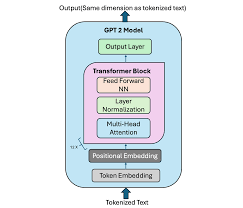

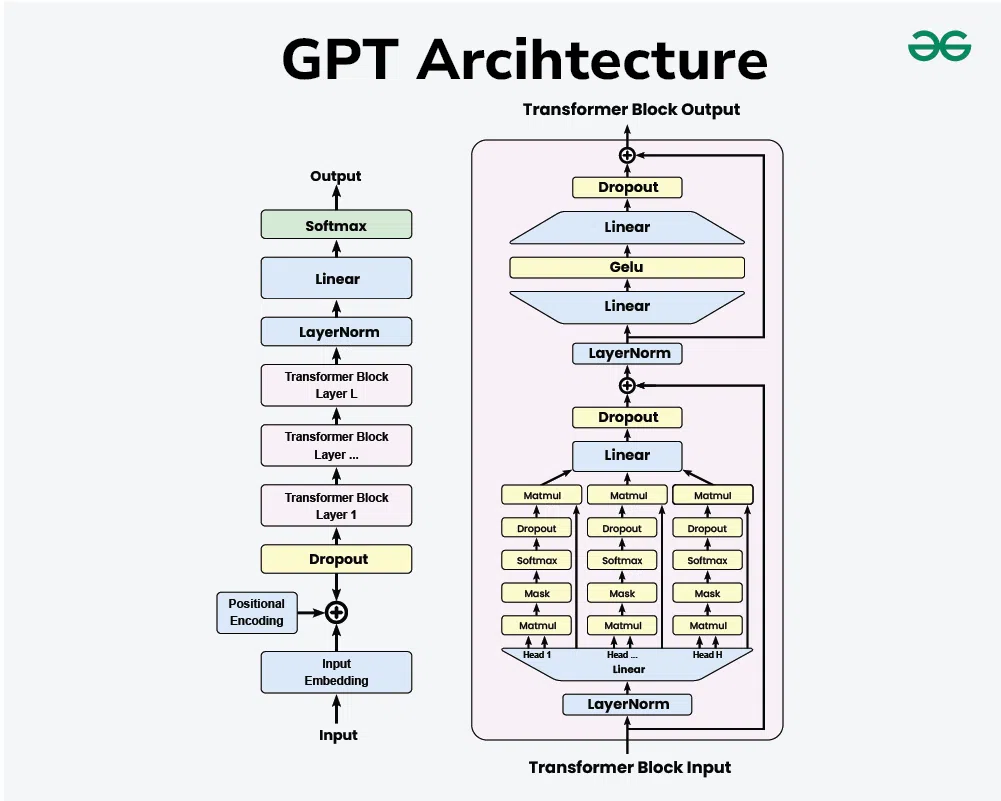

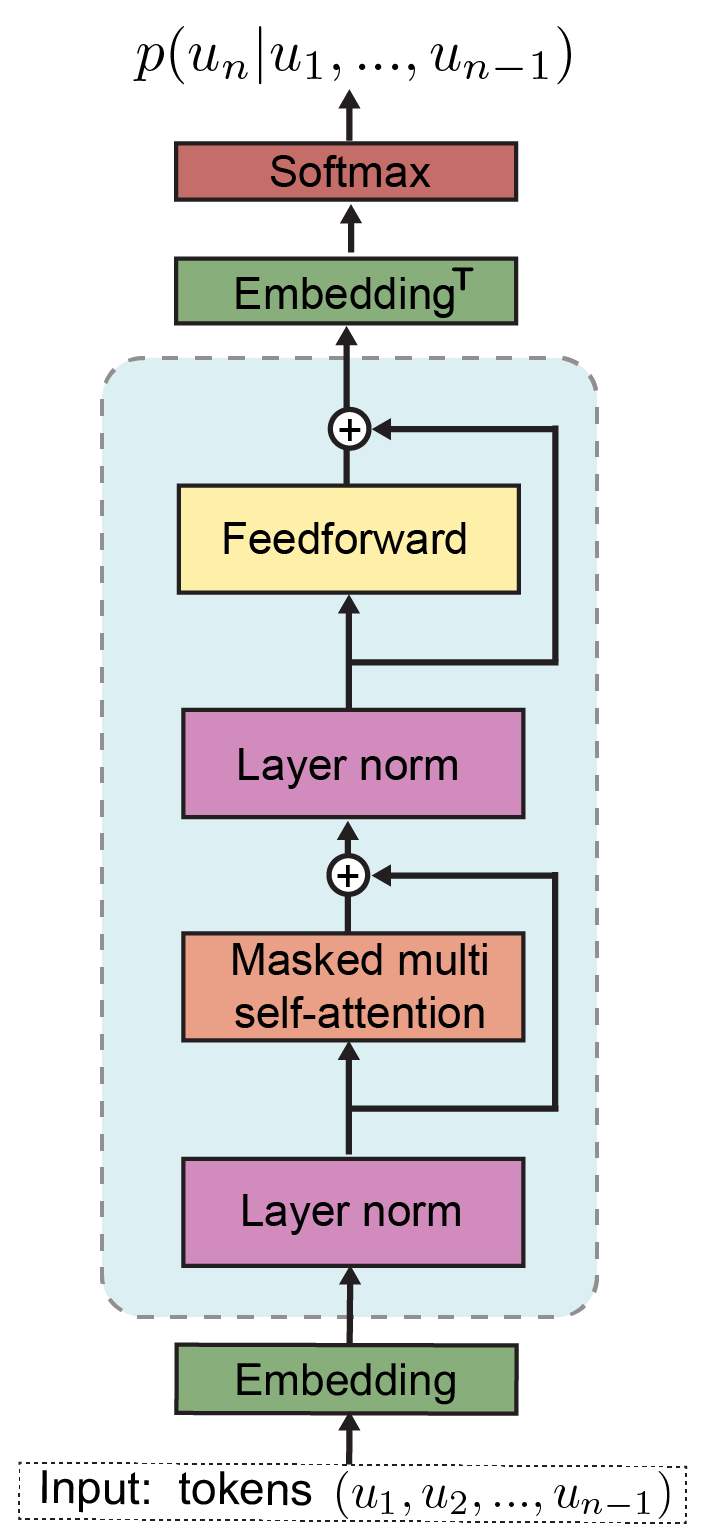

## Layer Normalisation
1. Traing deep NN with many layers can be challenging due to vanishing/ exploding gradient problem and leads to unstabe training dynamics
2. Layer Normalization improves the stability and efficiency of neural network.
3. It also prevents internal covariate shift which delays convergence.
4. After the Normalization the mean is 0 and variance is 1.
5. Core output: adjust the weight of neural network to have mean is 0 and variance is 1 and it speed up the convergence.
6. In models like GPT-2 , Layer normalization appears before masked mutli head attention and feed forward network in transformer block



In [2]:
## example
import torch
import torch.nn as nn
torch.manual_seed(123)
batch_example = torch.randn(2,5) ## two batch with 5 inputs
layer = nn.Sequential(nn.Linear(5,6), nn.ReLU())
out = layer(batch_example)
out


tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)

In [3]:
mean= out.mean(dim = -1,keepdim=True)
var = out.var(dim = -1, keepdim=True)
print(mean)
print(var)

tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


In [4]:
## applying noramlizaton
out_norm = (out-mean)/torch.sqrt(var)
mean = out_norm.mean(dim= -1, keepdim = True)
var = out_norm.var(dim= -1, keepdim = True)
print("Normalized layer output", out_norm)
print("Mean after normalization", mean)
print("Variance after normalization", var)


Normalized layer output tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean after normalization tensor([[9.9341e-09],
        [1.9868e-08]], grad_fn=<MeanBackward1>)
Variance after normalization tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


In [8]:
## coding Layer normalization class

class LayerNorm(nn.Module):
  def __init__(self, embed_dim):
    super().__init__()
    self.eps = 1e-5
    self.scale = nn.Parameter(torch.ones(embed_dim)) ## parameter of the same dim of input that LLM automatically adjust during training, this allows model to learn appropriate scaling and shifting that best suits the data it process
    self.shift = nn.Parameter(torch.zeros(embed_dim))

  def forward(self,x):
    mean = x.mean(dim = -1, keepdim = True)
    var = x.var(dim= -1, keepdim= True, unbiased = False) ## unbiased false turns off the bessels correction
    norm_x = (x-mean)/ torch.sqrt(var+self.eps) # added eps to ignore division by 0
    return self.scale*norm_x + self.shift

In [9]:
ln = LayerNorm(embed_dim = 5)
out_ln = ln(batch_example)
out_ln

tensor([[ 0.5528,  1.0693, -0.0223,  0.2656, -1.8654],
        [ 0.9087, -1.3767, -0.9564,  1.1304,  0.2940]], grad_fn=<AddBackward0>)

In [10]:
mean = out_ln.mean(dim = -1, keepdim = True)
var = out_ln.var(dim = -1, keepdim = True)
print(mean)
print(var)

tensor([[-2.9802e-08],
        [ 0.0000e+00]], grad_fn=<MeanBackward1>)
tensor([[1.2499],
        [1.2500]], grad_fn=<VarBackward0>)
